<img src="https://drive.google.com/uc?id=1-cL5eOpEsbuIEkvwW2KnpXC12-PAbamr" style="Width:1000px">

# Electrocardiograms

👇 Import the `electrocardiograms.csv` dataset and display its first 5 row

In [2]:
from nbta.utils import download_data
download_data(id='1h9PHp0urSlee7go8NRaWvcp_DS8h6qaa')

In [3]:
import pandas as pd

data = pd.read_csv('raw_data/electrocardiograms.csv')
data.head(5)

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.994200,1.000000,0.951276,0.903712,0.917633,0.900232,0.803944,0.656613,0.421114,0.288863,...,0.294664,0.295824,0.301624,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.984472,0.962733,0.663043,0.211180,0.000000,0.032609,0.100932,0.177019,0.270186,0.313665,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.619217,0.489324,0.327402,0.110320,0.000000,0.060498,0.108541,0.108541,0.145907,0.192171,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


ℹ️ Each obervation of the dataset is a numerically represented heartbeat, taken from a patient's electrocardiogram (ECG). The target is binary and defines whether the heartbeat is at risk of cardiovascular disease [1] or not [0]. 

# Data Exploration

👇 Plot an observation of each target class to get a visual idea of what the numbers represent.

In [4]:
data.columns

Index(['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10',
       ...
       'x_179', 'x_180', 'x_181', 'x_182', 'x_183', 'x_184', 'x_185', 'x_186',
       'x_187', 'target'],
      dtype='object', length=188)

In [5]:
at_risk = data[data['target']==1]
not_at_risk = data[data['target']==0]

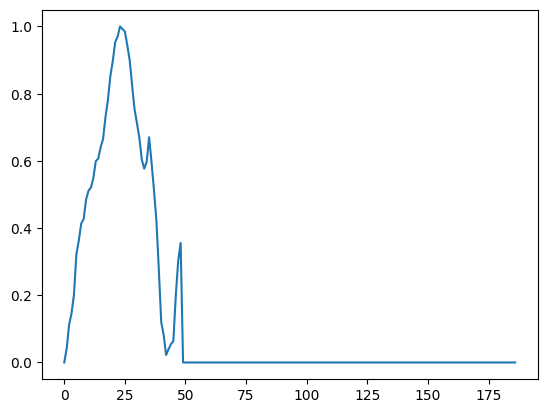

In [6]:
import matplotlib.pyplot as plt

plt.plot(at_risk.drop('target', axis=1).values[0]);

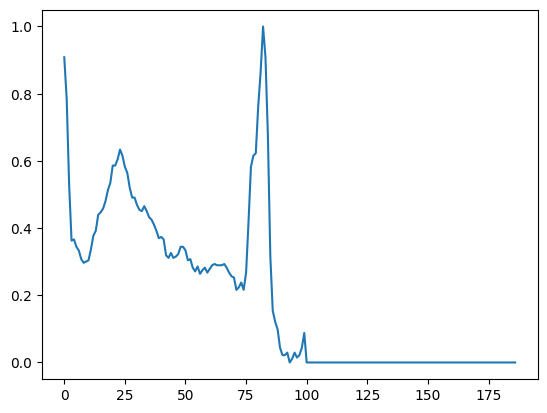

In [7]:
plt.plot(not_at_risk.drop('target', axis=1).values[0]);

👇 How many observations of at-risk heartbeats are there? Save your answer as `at_risk_count`.

In [8]:
at_risk_count = at_risk.shape[0]
at_risk_count

1448

👇 How many observations of healthy heartbeats are there? Save your answer as `healthy_count`.

In [9]:
healthy_count = not_at_risk.shape[0]
healthy_count

18117

ℹ️ In certain cases, the class balance is representative of the true class distribution. This is the case here: the vast majority of people actually have healthy hearts. In such case, we preserve the class distribution inform the model on the reality, and adapt our modelling approach accordingly.

### ☑️ Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('class_balance',
                         healthy = healthy_count,
                         at_risk = at_risk_count
)

result.write()
print(result.check())

#  Logistic Regression

🎯 Your task is to flag heartbeats that are at risk of cardiovascular diseases.

👇 Let's start by investigating the performance of a `LogisticRegression` on that task. Use cross validation to evaluate the model on the following metrics:
- Accuracy
- Recall
- Precision
- F1

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression(max_iter=2000)
metrics = ['accuracy','precision', 'recall','f1']

y = data['target'].copy()
X = data.drop('target', axis=1).copy()

cv = cross_validate(model, X, y, scoring=metrics)

In [13]:
cv.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

❓ What is the model's ratio of correct predictions? Save your answer under variable name `correct_pred_ratio`.

In [14]:
correct_pred_ratio = np.mean(cv['test_accuracy'])

❓ What percentage of at-risk heartbeats is the model able to flag? Save your answer under variable name `flag_ratio`.

In [15]:
flag_ratio = np.mean(cv['test_recall'])
flag_ratio

0.3300942608280635

❓ When the model signals an at-risk heartbeat, how often is it correct? Save your answer under variable name `correct_detection_ratio`.

In [17]:
correct_detection_ratio = np.mean(cv['test_precision'])

❓ What is the model's ability to flag as many at-risk heartbeats as possible while limiting false alarms?  Save your answer under variable name `aggregated_metric`.

In [18]:
aggregated_metric = np.mean(cv['test_f1'])

ℹ️ By observing the different metrics, you should see that accuracy is deceiving. To understand what is going on, we can observe a breakdown of the model's predictions in a confusion matrix.

### ☑️ Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('logistic_regression_evaluation',
                         accuracy = correct_pred_ratio,
                         recall = flag_ratio,
                         precision = correct_detection_ratio,
                         f1 = aggregated_metric
)

result.write()
print(result.check())

# Confusion Matrix

👇 Using `ConfusionMatrixDisplay` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)),  visualize the predictions breakdown of the Logistic Regression model.

<details>
<summary>💡 Hints</summary>

- `ConfusionMatrixDisplay` can be used straight from an estimator using the <code>from_estimator</code> method: see the documentation for details. 
    
- As inputs you will need a **trained model** and **test data**
    
- You'll need to go back to the **Holdout method!** You can use Sklearn's `train_test_split()` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))
    
- Look into the `normalize` parameter
  
</details>



In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

model = LogisticRegression(max_iter=2000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

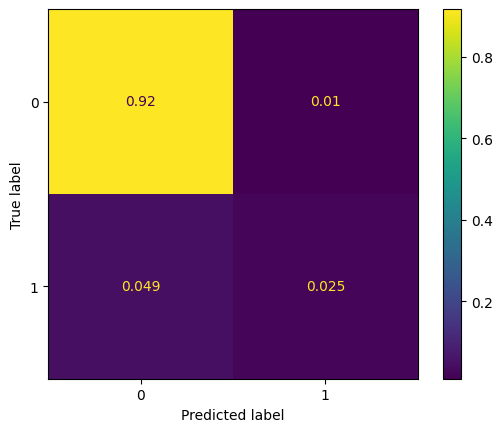

In [20]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='all');

ℹ️ The confusion matrix should show that the model is influenced by the class imbalance: it predicts heartbeats to be healthy most of the time. Due to this behaviour, the model is often correct and has a high accuracy. However, it causes it to miss out on many at risk heartbeats: it has a bad recall.

👉 This model is therefore poor at the task of **flagging at-risk observations**.

⚠️ Don't be fooled by the accuracy and look at the metric that corresponds to your task! ⚠️

# KNN Classifier

👇 Would a default KNN classifier perform better at the task of flagging at-risk observations?

Save the you answer under `best_model` as "KNN" or "LogisticRegression".

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

cv_knn = cross_validate(knn_classifier, X_train, y_train, scoring=metrics)

In [22]:
np.mean(cv_knn['test_recall'])

0.8184632473679126

In [23]:
best_model = 'KNN'

### Conclusion

The `KNN` model has a recall of 0.81, which is much better in this case than the recall of 0.33 for our `LogisticRegression` model!

### ☑️ Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model,
)
result.write()
print(result.check())

# Classification Report

Now that we know the KNN model has the best recall, let's check out its performance accross all the other classification metrics.

👇 Print out a `classification_report` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)) of the KNN model.

<details>
<summary> 💡 Hint  </summary>
    
You'll need to pass model predictions to `classification_report`. Sklearn's `cross_val_predict` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)) might help 😉
</details>




In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

results = cross_val_predict(KNeighborsClassifier(),X,y)

In [25]:
pd.DataFrame(classification_report(y, results, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.988709,0.940197,0.985433,0.964453,0.985118
recall,0.995639,0.857735,0.985433,0.926687,0.985433
f1-score,0.992162,0.897075,0.985433,0.944618,0.985125
support,18117.000000,1448.000000,0.985433,19565.000000,19565.000000


In [26]:
results.shape

(19565,)

❓ Looking at the classification report, what is the model's ratio of correctly predicted at-risk heartbeats? Save your answer as a float under `correct_atrisk_predictions`

In [27]:
correct_atrisk_predictions = 0.94

### ☑️ Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('precision',
                         precision = correct_atrisk_predictions,
)

result.write()
print(result.check())

# Prediction

🎯 A patient comes to you for a second opinion on what he was told may be an at risk heartbeat.  The data is saved as 'electrocardiograms_new_patient.csv' under data.


❓ According to your optimal model, is he at risk or not?  

Save the prediction of your model under variable name `prediction` as "at risk" or "healthy".

In [28]:
new_patient = pd.read_csv('raw_data/electrocardiograms_new_patient.csv')
new_patient.iloc[0,:]

x_1      0.904762
x_2      0.993197
x_3      1.000000
x_4      0.956916
x_5      0.902494
           ...   
x_183    0.000000
x_184    0.000000
x_185    0.000000
x_186    0.000000
x_187    0.000000
Name: 0, Length: 187, dtype: float64

In [29]:
best_classifier = KNeighborsClassifier().fit(X,y)

In [30]:
best_classifier.predict(new_patient)

array([1])

In [31]:
prediction = 'at risk'

### ☑️ Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())

# 🏁